# [**Illustration de l'Analyse des Composantes du Voisinage**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/1_6_neighbors/plot_nca_illustration.ipynb)<br/>([_Neighborhood Components Analysis Illustration_](https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_illustration.html))

Cet exemple illustre une métrique de distance apprise qui maximise la précision de la classification par plus proches voisins. Il fournit une représentation visuelle de cette métrique par rapport à l'espace de points d'origine. Pour plus d'informations, veuillez vous référer au Guide de l'Utilisateur.

In [1]:
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from scipy.special import logsumexp

from sklearn.datasets import make_classification
from sklearn.neighbors import NeighborhoodComponentsAnalysis

# Points d'origine

Tout d'abord, nous créons un ensemble de données composé de 9 échantillons répartis en 3 classes, et nous représentons les points dans l'espace d'origine. Dans cet exemple, nous nous concentrons sur la classification du point n°3. L'épaisseur d'un lien entre le point n°3 et un autre point est proportionnelle à leur distance.

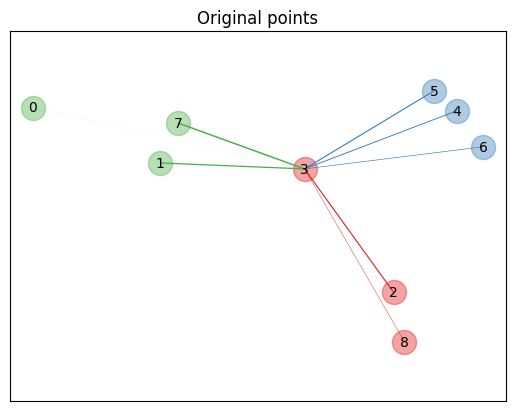

In [2]:
X, y = make_classification(
    n_samples=9,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=3,
    n_clusters_per_class=1,
    class_sep=1.0,
    random_state=0,
)

plt.figure(1)
ax = plt.gca()
for i in range(X.shape[0]):
    ax.text(X[i, 0], X[i, 1], str(i), va="center", ha="center")
    ax.scatter(X[i, 0], X[i, 1], s=300, c=cm.Set1(y[[i]]), alpha=0.4)

ax.set_title("Original points")
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axis("equal")  # so that boundaries are displayed correctly as circles


def link_thickness_i(X, i):
    diff_embedded = X[i] - X
    dist_embedded = np.einsum("ij,ij->i", diff_embedded, diff_embedded)
    dist_embedded[i] = np.inf

    # compute exponentiated distances (use the log-sum-exp trick to
    # avoid numerical instabilities
    exp_dist_embedded = np.exp(-dist_embedded - logsumexp(-dist_embedded))
    return exp_dist_embedded


def relate_point(X, i, ax):
    pt_i = X[i]
    for j, pt_j in enumerate(X):
        thickness = link_thickness_i(X, i)
        if i != j:
            line = ([pt_i[0], pt_j[0]], [pt_i[1], pt_j[1]])
            ax.plot(*line, c=cm.Set1(y[j]), linewidth=5 * thickness[j])


i = 3
relate_point(X, i, ax)
plt.show()

# Apprentissage d'une projection

Nous utilisons [**`NeighborhoodComponentsAnalysis`**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NeighborhoodComponentsAnalysis.html#sklearn.neighbors.NeighborhoodComponentsAnalysis) pour apprendre une projection et représentons les points après la transformation. Ensuite, nous prenons la projection et trouvons les plus proches voisins.

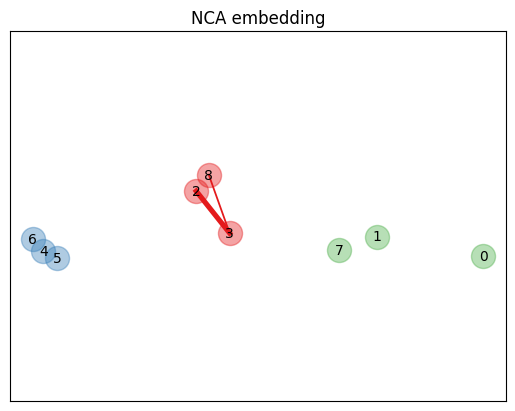

In [3]:
nca = NeighborhoodComponentsAnalysis(max_iter=30, random_state=0)
nca = nca.fit(X, y)

plt.figure(2)
ax2 = plt.gca()
X_embedded = nca.transform(X)
relate_point(X_embedded, i, ax2)

for i in range(len(X)):
    ax2.text(X_embedded[i, 0], X_embedded[i, 1], str(i), va="center", ha="center")
    ax2.scatter(X_embedded[i, 0], X_embedded[i, 1], s=300, c=cm.Set1(y[[i]]), alpha=0.4)

ax2.set_title("NCA embedding")
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax2.axis("equal")
plt.show()